<a href="https://colab.research.google.com/github/kofibeans/APM1111-FA6/blob/main/AQUINO_APM1111_FA6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **APM1111 Formative Assessment 6**

**Instruction**

Provide an R or Python (with markdown) file for the independent samples t-test for Invisibility Cloak data set.

*   The file should have all the codes/and or explanations from Assumption 1 to 5 and computation.
*   Present the results of the analysis by making a short report.

### **Import Library and Dataset**
Import couple of Python library required for the analysis and create the dataset.

In [ ]:
# import library

import numpy as np
import pandas as pd # data processing, csv file i/o (e.g. pd.read_csv)
import scipy.stats as stats # statistical operations
from scipy.stats import ttest_ind

# visualization tools
import matplotlib.pyplot as plt
from IPython.display import display

!pip install ptitprince
import ptitprince as pt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

!pip install researchpy
import researchpy as rp # statistical operations

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 3.7 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10653 sha256=12cc719eac25d8a26f713b8ed65ff32a548579bca9c26c44dde77c694227e1c0
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# create the dataset
data = {
    'Participant': list(range(1, 25)),
    'Cloak': [0]*12 + [1]*12,
    'Mischief': [3, 1, 5, 4, 6, 4, 6, 2, 0, 5, 4, 5, 4, 3, 6, 6, 8, 5, 5, 4, 2, 5, 7, 5]
}

df = pd.DataFrame(data)
df.style

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


### **Assumption Check**
Before the t-test can be interpreted, one needs to test the assumptions to consider the results as valid.

**Assumption 1.** The dependent variable (Mischief) is a *continuous* level.

**Assumption 2.** The independent variable (Cloak) consists of two *categorical*, independent
groups (With a cloak, Without a cloak).

**Assumption 3.** Each participant is present to only one group.

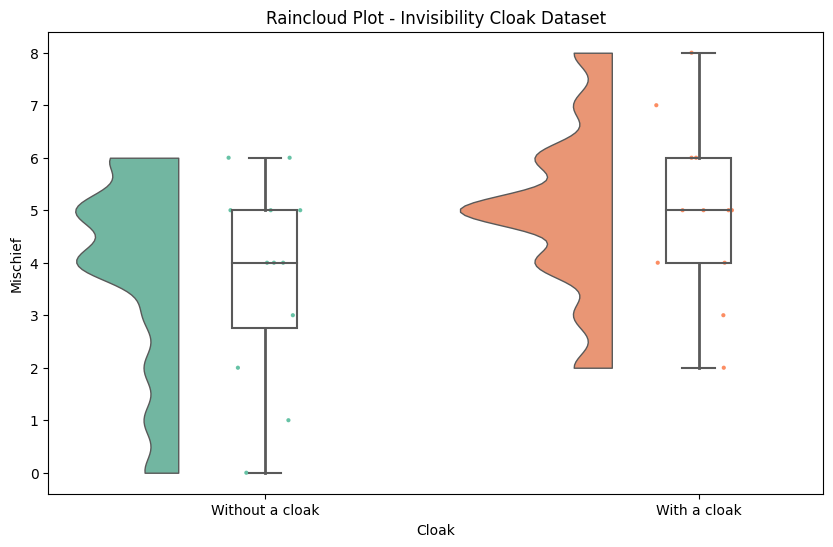

In [ ]:
# creating the raincloud plot
plt.figure(figsize=(10, 6))

pt.RainCloud(x='Cloak', y='Mischief', data=df, palette="Set2")

plt.xticks([0, 1], ['Without a cloak', 'With a cloak'])
plt.title("Raincloud Plot - Invisibility Cloak Dataset")
plt.xlabel("Cloak")
plt.ylabel("Mischief")

plt.show()

**Assumption 4. Outliers** There are *no significant outliers* in the two groups of independent variable (Cloak) in terms of the dependent variable (Mischief), as assessed by visual inspection of boxplots.

**Assumption 5. Normality.** The dependent variable (Mischief) for each group (Cloak) is normally distributed (p > 0.05), as assessed by Shapiro-Wilk test.

In [ ]:
# checking the normality assumption for each group using Shapiro-Wilk test
group_0 = df[df['Cloak'] == 0]['Mischief']
group_1 = df[df['Cloak'] == 1]['Mischief']

shapiro_0 = stats.shapiro(group_0)
shapiro_1 = stats.shapiro(group_1)

# creating a table for the Shapiro-Wilk test results
results = pd.DataFrame({'Mischief': ['Without a cloak', 'With a cloak'],
                        'W-statistic': [shapiro_0.statistic, shapiro_1.statistic],
                       'p-value': [shapiro_0.pvalue, shapiro_1.pvalue]})

print("\nTest of Normality (Shapiro-Wilk)")

results.style


Test of Normality (Shapiro-Wilk)


,Mischief,W-statistic,p-value
0,Without a cloak,0.912764,0.231446
1,With a cloak,0.972617,0.936188


*Note.* Significant results suggest a deviation from normality.

**Assumption 6. Homogeneity of variances.** There is equality of variances between groups (Without a cloak, With a cloak) on their number of mischievous acts (Mischief), as assessed by Levene’s test of equality of variances.


In [ ]:
# perform brown-forsythe test
bf_results = stats.levene(group_0, group_1, center='median')

# create a dictionary with the results
results = {
    'F': bf_results.statistic,
    'df1': [2 - 1],
    'df2': [len(group_0) + len(group_1) - 2],
    'p': bf_results.pvalue
}

# create a dataframe with the results
results_f = pd.DataFrame(results)

# print and style the dataframe
print("\n Test of Equality of Variances (Brown-Forsythe)")
results_f.style.format("{:,.3f}")


 Test of Equality of Variances (Brown-Forsythe)


,F,df1,df2,p
0,0.270,1.000,22.000,0.609


### **Computation**

**descriptives: the summary statistical information**

In [ ]:
group_0 = df[df['Cloak'] == 0]['Mischief']
group_1 = df[df['Cloak'] == 1]['Mischief']

# create a new dataframe
new_df = pd.DataFrame({'Group 0': group_0, 'Group 1': group_1})

# use describe() on the new dataframe
description = new_df.describe()

# display
description.style.format("{:,.3f}")

,Group 0,Group 1
count,12.000,12.000
mean,3.750,5.000
std,1.913,1.651
min,0.000,2.000
25%,2.750,4.000
50%,4.000,5.000
75%,5.000,6.000
max,6.000,8.000


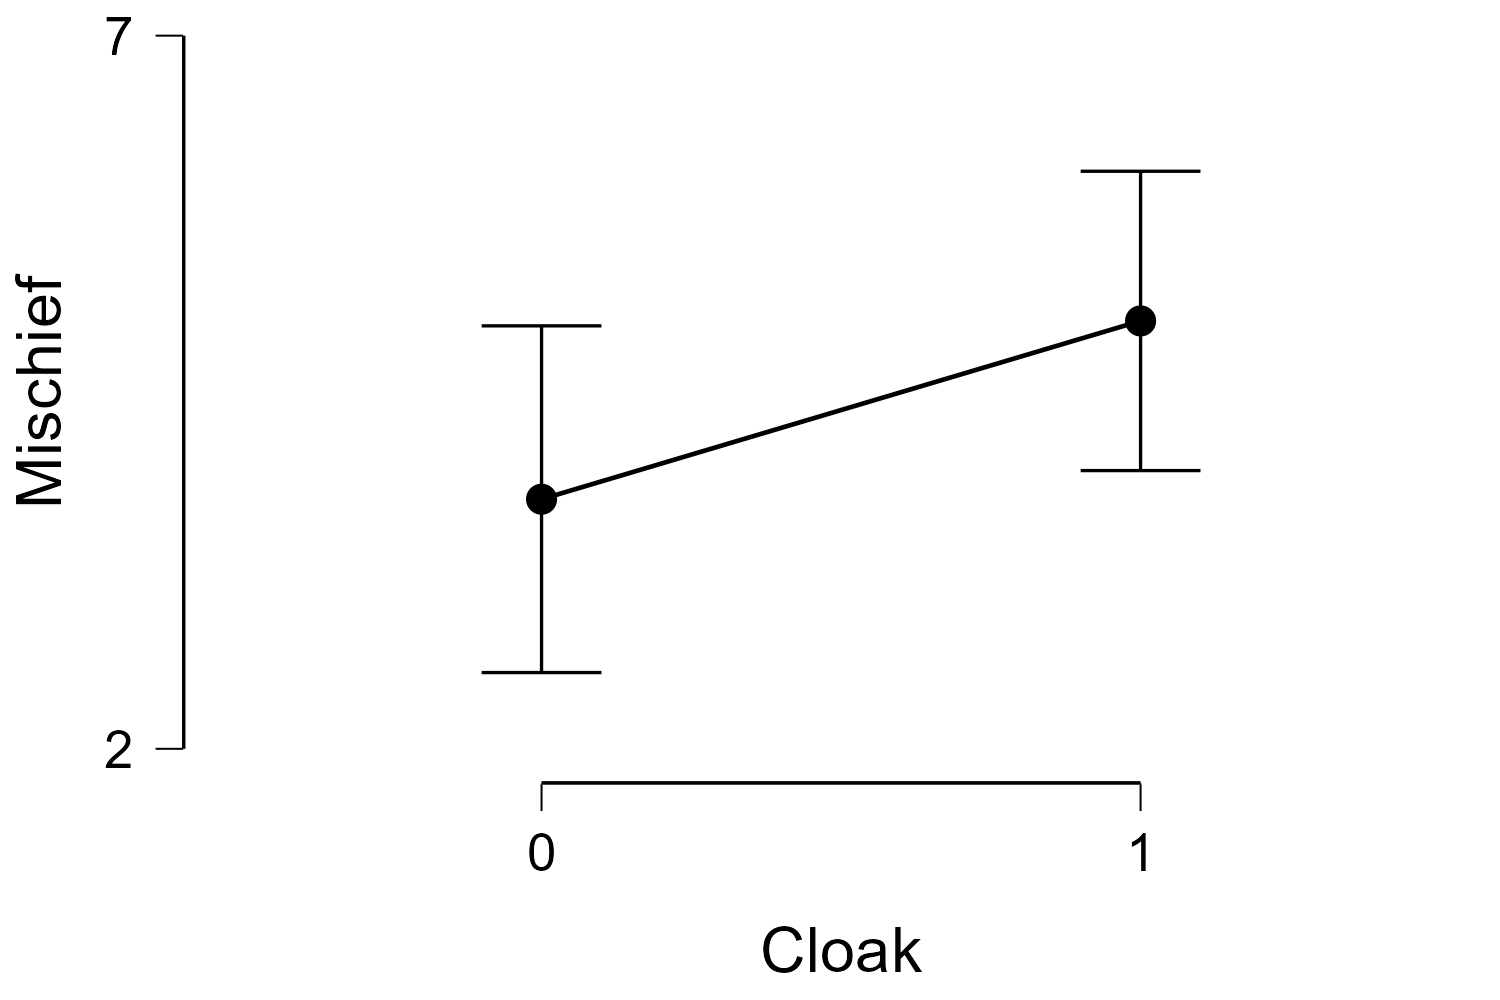

**the statistical test information**

In [21]:
# define the two groups of data
group_0 = [3, 1, 5, 4, 6, 4, 6, 2, 0, 5, 4, 5]
group_1 = [4, 3, 6, 6, 8, 5, 5, 4, 2, 5, 7, 5]

# perform independent samples t-test
t_statistic, p_value = ttest_ind(group_0, group_1)

# calculate mean difference
mean_difference = np.mean(group_0) - np.mean(group_1)

# calculate standard error of the difference
se_difference = np.sqrt(np.var(group_0, ddof = 1)/len(group_0) + np.var(group_1,ddof = 1)/len(group_1))

# calculate 95% CI for mean difference
ci_lower = mean_difference - 1.96 * se_difference
ci_upper = mean_difference + 1.96 * se_difference

# create a dictionary with the results
results = {
    't': [t_statistic],
    'df': [len(group_0) + len(group_1) - 2],
    'p-value': [p_value],
    'Mean Difference': [mean_difference],
    'SE Difference': [se_difference],
    '95% CI (Lower)': [ci_lower],
    '95% CI (Upper)': [ci_upper]
}

# create a dataframe from the dictionary
df_results = pd.DataFrame(results)

# format float of the dataframe
df_results.style.format("{:,.3f}")

,t,df,p-value,Mean Difference,SE Difference,d,95% CI (Lower),95% CI (Upper)
0,-1.713,22.000,0.101,-1.250,0.730,-1.713,-2.680,0.180


This table shows the output for the independent samples t-test. The differences between the groups are not statistically significant at the .05 level, which means that the data do not provide much motivation to reject the null hypothesis.

### **Presenting the results**

Students wearing an invisibility cloak (M = 5.00, SD =	1.65, n = 12) did not conduct more acts of mischief than students not wearing invisibility cloak (M = 3.75,	SD = 1.91, n = 12), t(22) = -1.71, p = 0.101, 95% CI [-2.68 0.18].